# Billboard EDA notebook, Volume 1

# This was the first EDA notebook I did.

## dataset: https://data.world/kcmillersean/billboard-hot-100-1958-2017




 # Packages, Loading and Cleaning Initial DF (billboard_df)

 
 

In [2]:
# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime



%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [4]:
#shape of initial dataframe
billboard_df.shape

(317795, 10)

In [5]:
# Checking Initial Head
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [6]:
# Checking initial tail
billboard_df.tail()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
317790,http://www.billboard.com/charts/hot-100/1960-0...,7/2/1960,6,That's All You Gotta Do,Brenda Lee,That's All You Gotta DoBrenda Lee,1,17.0,6,5
317791,http://www.billboard.com/charts/hot-100/1968-0...,2/24/1968,6,Simon Says,1910 Fruitgum Co.,Simon Says1910 Fruitgum Co.,1,17.0,6,5
317792,http://www.billboard.com/charts/hot-100/1971-0...,3/6/1971,6,She's A Lady,Tom Jones,She's A LadyTom Jones,1,17.0,6,5
317793,http://www.billboard.com/charts/hot-100/1979-0...,6/9/1979,6,Ring My Bell,Anita Ward,Ring My BellAnita Ward,1,19.0,6,5
317794,http://www.billboard.com/charts/hot-100/1967-0...,6/24/1967,6,San Francisco (Be Sure To Wear Flowers In Your...,Scott McKenzie,San Francisco (Be Sure To Wear Flowers In Your...,1,20.0,6,5


## Note: there's no clear pattern to how the original dataframe is indexed. That's not a huge concern. I'm making a note for my own sake, because I tried and failed to figure out a pattern. 

## The dataset has 317,795 rows and 10 columns. Each row observation is a song on the Hot 100 chart for a given week. 

In [7]:
# Converting WeekID to datetime
# Note: I'm comfortable with replacing the string column "WeekID"

billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [8]:
# Renaming columns to Python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [9]:
# dropping 'URL' column- I don't think I'll reference it for now

billboard_df = billboard_df.drop(columns=['url'])

In [10]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [11]:
# replacing artist names: pre string-split

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 


In [12]:
# String Split
new = billboard_df["performer"].str.split(" Featuring ", n = 1, expand = True) 
billboard_df["main_performer"]= new[0] 
billboard_df["featured_performer"]= new[1] 

In [13]:
# Post-String Split replacements of artist names
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Janet Jackson", "Janet")
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Jay Z", "Jay-Z")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Janet Jackson", "Janet")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Jay Z", "Jay-Z")
# Frankie Valli and the 4 Seasons
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Frankie Valli", "The 4 Seasons")

# Note: this is the end of cleaning billboard_df. 

In [14]:
# checking datatypes
billboard_df.dtypes

week_id               datetime64[ns]
week_position                  int64
song                          object
performer                     object
song_id                       object
instance                       int64
prev_week_position           float64
peak_position                  int64
weeks_on_chart                 int64
date                          object
month                          int64
day                            int64
year                           int64
main_performer                object
featured_performer            object
dtype: object

In [15]:
#checking for null values
# it's ok that prev_week_position has nulls - that means the song made its debut on the charts (or made a reappearance)
billboard_df.isna().sum()

week_id                    0
week_position              0
song                       0
performer                  0
song_id                    0
instance                   0
prev_week_position     30428
peak_position              0
weeks_on_chart             0
date                       0
month                      0
day                        0
year                       0
main_performer             0
featured_performer    288841
dtype: int64

In [16]:
# checking earliest week id
billboard_df.week_id.min()

Timestamp('1958-08-02 00:00:00')

In [17]:
# checking latest week id
billboard_df.week_id.max()

Timestamp('2019-06-22 00:00:00')

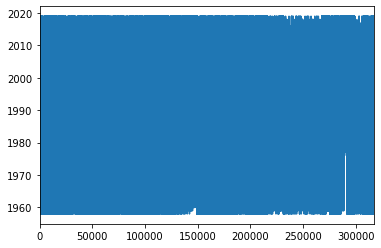

In [18]:
# checking distribution by year (validating data)
# note: this will not be in presentation
billboard_df.year.plot()

##  so our dataframe is mostly uniform by year: we have 4 months of 1958 data, and 5.5 months of 2019 data. 

## I'm choosing to keep the partial years, while keeping them in mind.

In [19]:
# validating distribution by month
billboard_df.month.value_counts()

12    27098
10    27000
8     27000
3     27000
1     27000
5     26900
7     26600
9     26200
4     26200
6     26100
11    26097
2     24600
Name: month, dtype: int64

In [20]:
# just validating the "prev_week_position" column
billboard_df.prev_week_position.max()

100.0

In [21]:
# validating "prev_week_position" column
billboard_df.prev_week_position.min()

1.0

In [22]:
# Main Performer value counts

# These are the main performers who had the most observations in the dataset.

billboard_df.main_performer.value_counts().head(10)

Drake            1158
Taylor Swift      953
Elvis Presley     953
Elton John        889
Madonna           885
Rihanna           876
Kenny Chesney     749
Tim McGraw        738
Chris Brown       732
Usher             722
Name: main_performer, dtype: int64

In [23]:
billboard_df.featured_performer.value_counts().head(10)

Drake          691
Lil Wayne      626
Nicki Minaj    456
Chris Brown    341
T-Pain         306
Jay-Z          301
Ludacris       299
Rihanna        297
Akon           286
Kanye West     192
Name: featured_performer, dtype: int64

In [24]:
# creating DF of main performer value counts - this is just total appearances on chart, and does not consider chart position

main_performer_value_counts_df = billboard_df.main_performer.value_counts().to_frame().reset_index().rename(columns={"index": "main_performer", "main_performer": "total_weeks"})

In [25]:
# creating DF of main performer value counts - this is just total appearances on chart, and does not consider chart position

featured_performer_value_counts_df = billboard_df.featured_performer.value_counts().to_frame().reset_index().rename(columns={"index": "featured_performer", "featured_performer": "total_weeks"})

In [26]:
# validating head of performer value counts
main_performer_value_counts_df.head(200)

,main_performer,total_weeks
0,Drake,1158
1,Taylor Swift,953
2,Elvis Presley,953
3,Elton John,889
4,Madonna,885
5,Rihanna,876
6,Kenny Chesney,749
7,Tim McGraw,738
8,Chris Brown,732
9,Usher,722


In [27]:
featured_performer_value_counts_df.head()

,featured_performer,total_weeks
0,Drake,691
1,Lil Wayne,626
2,Nicki Minaj,456
3,Chris Brown,341
4,T-Pain,306


In [28]:
# checking description of total weeks in "performer value counts" df
main_performer_value_counts_df.total_weeks.describe()

count    7924.000000
mean       40.105376
std        75.818177
min         1.000000
25%         7.000000
50%        16.000000
75%        36.000000
max      1158.000000
Name: total_weeks, dtype: float64

In [29]:
featured_performer_value_counts_df.total_weeks.describe()

count    1257.000000
mean       23.034208
std        41.812837
min         1.000000
25%         5.000000
50%        16.000000
75%        24.000000
max       691.000000
Name: total_weeks, dtype: float64

## We have 7,924 unique values in the "main performer" column, and 1,257 unique values in the "featured performer" column. 

## The mean artist is on the charts for 40 weeks, and the median artist is on the charts for 16 weeks, meaning we have some skew from upper bound outliers. 

## The mean featured artist is on the chart for 23 weeks, while the median featured artist is on the charts for 16 weeks. This indicates some skew from upper bound outliers, but the skew is smaller than the skew for main performers.

Text(0.5, 1.0, '1958-2019: Main Performer Weeks On Chart')

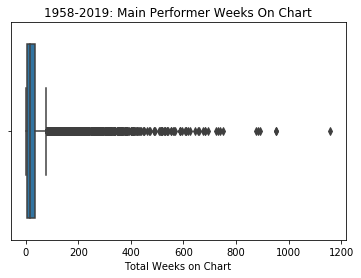

In [86]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="total_weeks", data=main_performer_value_counts_df)
plt.xlabel('Total Weeks on Chart')
plt.title('1958-2019: Main Performer Weeks On Chart')

Text(0.5, 1.0, '1958-2019: Featured Performer Weeks On Chart')

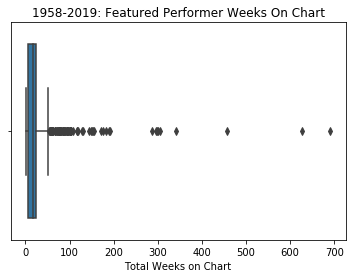

In [87]:
ax = sns.boxplot(x="total_weeks", data=featured_performer_value_counts_df)
plt.xlabel('Total Weeks on Chart')
plt.title('1958-2019: Featured Performer Weeks On Chart')

(array([7.261e+03, 4.310e+02, 1.280e+02, 5.500e+01, 2.300e+01, 1.600e+01,
        4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.1670e+02, 2.3240e+02, 3.4810e+02, 4.6380e+02,
        5.7950e+02, 6.9520e+02, 8.1090e+02, 9.2660e+02, 1.0423e+03,
        1.1580e+03]),
 <a list of 10 Patch objects>)

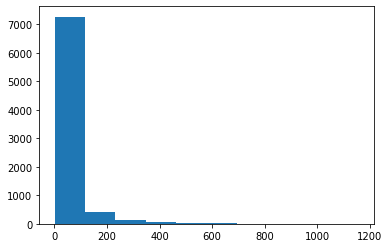

In [32]:
plt.hist(main_performer_value_counts_df.total_weeks)

(array([1.189e+03, 4.900e+01, 1.000e+01, 0.000e+00, 6.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  1.,  70., 139., 208., 277., 346., 415., 484., 553., 622., 691.]),
 <a list of 10 Patch objects>)

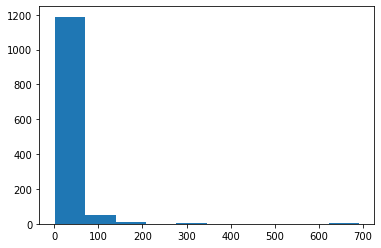

In [33]:
plt.hist(featured_performer_value_counts_df.total_weeks)

In [34]:
# making value counts DF for individual songs
song_value_count_df = billboard_df.song_id.value_counts().to_frame().reset_index().rename(columns={"index": "song_id", "song_id": "total_weeks"})

In [35]:
# checking head of "song value counts" - total weeks on chart

song_value_count_df.head()

,song_id,total_weeks
0,RadioactiveImagine Dragons,87
1,SailAWOLNATION,79
2,I'm YoursJason Mraz,76
3,How Do I LiveLeAnn Rimes,69
4,Party Rock AnthemLMFAO Featuring Lauren Bennet...,68


In [36]:
# checking distribution of total weeks by song
song_value_count_df.total_weeks.describe()

count    28193.000000
mean        11.272124
std          8.114231
min          1.000000
25%          5.000000
50%         10.000000
75%         16.000000
max         87.000000
Name: total_weeks, dtype: float64

Text(0.5, 1.0, '1958-2019: Song Total Weeks On Chart')

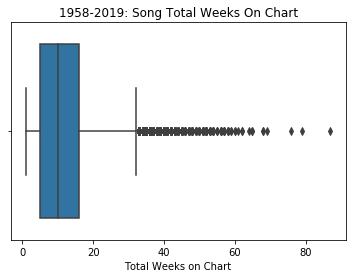

In [88]:
# boxplot of total weeks by song
ax = sns.boxplot(x="total_weeks", data=song_value_count_df)
plt.xlabel('Total Weeks on Chart')
plt.title('1958-2019: Song Total Weeks On Chart')

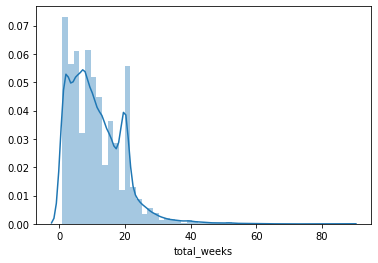

In [38]:
# Distribution of total weeks by song
ax = sns.distplot(song_value_count_df.total_weeks)

(array([1.3775e+04, 8.8350e+03, 4.5210e+03, 6.9800e+02, 2.1900e+02,
        9.8000e+01, 3.6000e+01, 8.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <a list of 10 Patch objects>)

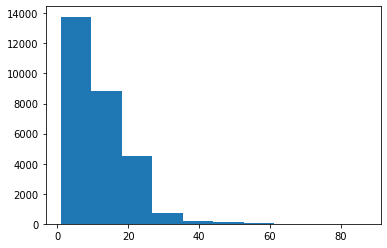

In [39]:
plt.hist(song_value_count_df.total_weeks)

In [40]:
# re-checking value counts 

song_value_count_df.total_weeks.describe()

count    28193.000000
mean        11.272124
std          8.114231
min          1.000000
25%          5.000000
50%         10.000000
75%         16.000000
max         87.000000
Name: total_weeks, dtype: float64

In [41]:
# checking for null values
billboard_df.isna().sum()

week_id                    0
week_position              0
song                       0
performer                  0
song_id                    0
instance                   0
prev_week_position     30428
peak_position              0
weeks_on_chart             0
date                       0
month                      0
day                        0
year                       0
main_performer             0
featured_performer    288841
dtype: int64

# The only variables with nulls are 'prev_week_position' and 'featured_performer'.  This makes sense: 'prev_week_position' is null the week before a song appears or re-appears on the chart.

# 'Featured_performer' is null whenever a song has no feature. 

# Clean dataset, cheers to [Sean Miller!](https://data.world/kcmillersean)

In [42]:
# count of unique Song IDs
billboard_df.song_id.nunique()

28193

In [43]:
# checking max of "instance" by song

billboard_df.instance.max()

8

In [44]:
# value counts of "instance"
billboard_df['instance'].value_counts()

1    300545
2     14716
3      2063
4       265
5       127
6        51
7        17
8        11
Name: instance, dtype: int64

In [45]:
# creating groupby for "instance"
# we can treat the max value of "instance" as the number of instances a song had

unique_songs_groupby = billboard_df.groupby('song_id').max()

In [46]:
# checking head of "unique songs groupby" 
unique_songs_groupby.head()

,week_id,week_position,song,performer,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
song_id,,,,,,,,,,,,,,
"""B"" GirlsYoung And Restless",1990-08-11,91,"""B"" Girls",Young And Restless,1,84.0,84,15,1990-08-11,8,30,1990,Young And Restless,NaN
"""Cherry Cherry"" from Hot August NightNeil Diamond",1973-05-19,84,"""Cherry Cherry"" from Hot August Night",Neil Diamond,1,84.0,84,10,1973-05-19,5,31,1973,Neil Diamond,NaN
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",1973-12-08,99,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),1,99.0,99,9,1973-12-08,12,27,1973,The Ovations (Featuring Louis Williams),NaN
"""Joy"" Pt. IIsaac Hayes",1974-02-16,72,"""Joy"" Pt. I",Isaac Hayes,1,72.0,72,9,1974-02-16,12,29,1974,Isaac Hayes,NaN
"""Roots"" MedleyQuincy Jones",1977-04-16,87,"""Roots"" Medley",Quincy Jones,1,87.0,87,7,1977-04-16,4,26,1977,Quincy Jones,NaN


In [47]:
unique_songs_groupby.instance.describe()

count    28193.000000
mean         1.079807
std          0.334501
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: instance, dtype: float64

Text(0.5, 1.0, '1958-2019: Song Total Unique Appearances On Billboard Hot 100')

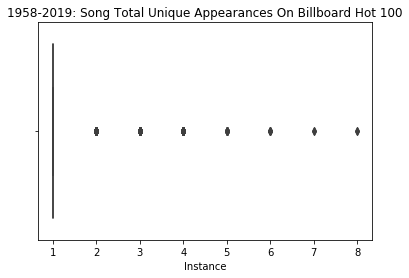

In [91]:
# boxplot of maximum instance per song - we can treat max as "number of instances"
ax = sns.boxplot(x="instance", data= unique_songs_groupby)
plt.xlabel('Instance')
plt.title('1958-2019: Song Total Unique Appearances On Billboard Hot 100')

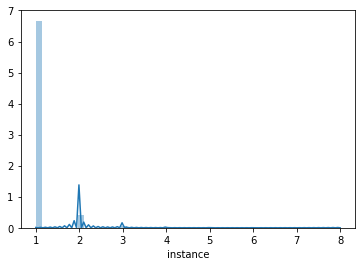

In [49]:
# distplot of instance by song

ax = sns.distplot(unique_songs_groupby.instance)

(array([2.6325e+04, 1.5840e+03, 2.2400e+02, 0.0000e+00, 3.8000e+01,
        1.2000e+01, 0.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

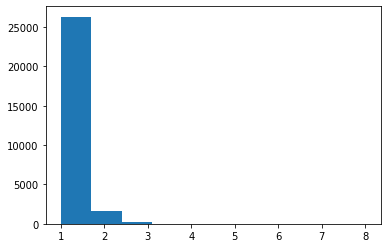

In [50]:
plt.hist(unique_songs_groupby.instance)

In [51]:
# making DF of value counts for 'instance by song id'

song_id_instance_value_counts_df = unique_songs_groupby.instance.value_counts().to_frame()

In [52]:
# checking head of song id instance value counts
song_id_instance_value_counts_df.head(10)

,instance
1,26325
2,1584
3,224
4,38
5,12
6,6
8,2
7,2


In [53]:
# applying lambda to find percentage of total songs with maximum instance

song_id_instance_value_counts_df['percentage'] = song_id_instance_value_counts_df.apply(lambda row: row.instance / 28193, axis=1)

In [54]:
# re-checking head of "song id instance value counts df"

song_id_instance_value_counts_df.head(10)

,instance,percentage
1,26325,0.933742
2,1584,0.056184
3,224,0.007945
4,38,0.001348
5,12,0.000426
6,6,0.000213
8,2,0.000071
7,2,0.000071


# 93% of observations pertain to a song on its initial run.

## It's possible that I can make my life easier on some analyses if I only look at a song's initial run.

In [55]:
# validating value counts of instance

billboard_df.instance.value_counts().sum()

317795

# The next few cells were exploratory. I was interested in what kind of songs were having multiple instances. 

In [56]:
# checking out songs that have eight instances

eight_instances_df = billboard_df[billboard_df['instance'].isin([8])]

In [57]:
eight_instances_df.head(11)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
231199,2018-12-08,23,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,NaN,23,23,2018-12-08,12,8,2018,Brenda Lee,None
231200,2018-12-15,21,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,23.0,21,24,2018-12-15,12,15,2018,Brenda Lee,None
231201,2018-12-01,29,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,NaN,29,24,2018-12-01,12,1,2018,Mariah Carey,None
231202,2018-12-08,14,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,29.0,14,25,2018-12-08,12,8,2018,Mariah Carey,None
231203,2018-12-22,18,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,21.0,18,25,2018-12-22,12,22,2018,Brenda Lee,None
231204,2018-12-15,7,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,14.0,7,26,2018-12-15,12,15,2018,Mariah Carey,None
231205,2018-12-29,11,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,18.0,11,26,2018-12-29,12,29,2018,Brenda Lee,None
231206,2018-12-22,6,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,7.0,6,27,2018-12-22,12,22,2018,Mariah Carey,None
231207,2019-01-05,9,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,8,11.0,9,27,2019-01-05,1,5,2019,Brenda Lee,None
231208,2018-12-29,7,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,8,6.0,6,28,2018-12-29,12,29,2018,Mariah Carey,None


In [58]:
# creating groupby to get unique SongIds
# note: I'm just using this to create a list - I'm not currently running any numbers on these lists. 
# that means that 'max' isn't actually being used: I just needed to pick a function to whittle down the groupby

eight_instances_groupby = eight_instances_df.groupby('song_id').max()

In [59]:
eight_instances_groupby.head()

,week_id,week_position,song,performer,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
song_id,,,,,,,,,,,,,,
All I Want For Christmas Is YouMariah Carey,2019-01-05,29,All I Want For Christmas Is You,Mariah Carey,8,29.0,29,29,2019-01-05,12,29,2019,Mariah Carey,NaN
Rockin' Around The Christmas TreeBrenda Lee,2019-01-05,23,Rockin' Around The Christmas Tree,Brenda Lee,8,23.0,23,27,2019-01-05,12,29,2019,Brenda Lee,NaN


 # This makes my life easier: 'Instance' seems to mean when a song makes a reappearance on the chart. 

In [60]:
seven_instances_df = billboard_df[billboard_df['instance'].isin([7])]

In [61]:
seven_instances_df.head(17)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
231187,2018-12-08,39,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,NaN,39,12,2018-12-08,12,8,2018,Nat King Cole,None
231188,2018-12-15,29,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,39.0,29,13,2018-12-15,12,15,2018,Nat King Cole,None
231189,2018-12-22,24,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,29.0,24,14,2018-12-22,12,22,2018,Nat King Cole,None
231190,2018-12-29,17,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,24.0,17,15,2018-12-29,12,29,2018,Nat King Cole,None
231191,2019-01-05,11,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,7,17.0,11,16,2019-01-05,1,5,2019,Nat King Cole,None
231192,2017-12-16,21,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,NaN,21,20,2017-12-16,12,16,2017,Mariah Carey,None
231193,2017-12-23,37,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,7,NaN,37,20,2017-12-23,12,23,2017,Brenda Lee,None
231194,2017-12-23,11,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,21.0,11,21,2017-12-23,12,23,2017,Mariah Carey,None
231195,2017-12-30,34,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,7,37.0,34,21,2017-12-30,12,30,2017,Brenda Lee,None
231196,2017-12-30,9,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,7,11.0,9,22,2017-12-30,12,30,2017,Mariah Carey,None


In [62]:
six_instances_df = billboard_df[billboard_df['instance'].isin([6])]

In [63]:
six_instances_df.head(51)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
231175,2017-12-23,42,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,6,NaN,42,9,2017-12-23,12,23,2017,Nat King Cole,None
231176,2017-12-30,38,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,6,42.0,38,10,2017-12-30,12,30,2017,Nat King Cole,None
231177,2018-01-06,42,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,6,37.0,38,11,2018-01-06,1,6,2018,Nat King Cole,None
231178,2016-12-17,23,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,NaN,23,15,2016-12-17,12,17,2016,Mariah Carey,None
231179,2017-03-04,95,Sex With Me,Rihanna,Sex With MeRihanna,6,NaN,95,15,2017-03-04,3,4,2017,Rihanna,None
231180,2016-12-24,17,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,23.0,17,16,2016-12-24,12,24,2016,Mariah Carey,None
231181,2016-12-31,20,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,17.0,17,17,2016-12-31,12,31,2016,Mariah Carey,None
231182,2016-12-24,37,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,6,NaN,37,17,2016-12-24,12,24,2016,Brenda Lee,None
231183,2017-01-07,16,All I Want For Christmas Is You,Mariah Carey,All I Want For Christmas Is YouMariah Carey,6,20.0,16,18,2017-01-07,1,7,2017,Mariah Carey,None
231184,2016-12-31,48,Rockin' Around The Christmas Tree,Brenda Lee,Rockin' Around The Christmas TreeBrenda Lee,6,37.0,37,18,2016-12-31,12,31,2016,Brenda Lee,None


# Interesting results from these snapshots. It makes sense why the Christmas songs would reappear during the holidays. Apparently the Rihanna song was popular on, um, Valentine's Day Spotify playlists. 

## "Goosebumps" seems to be a weird case- jumping from not rated into the 40s. It seems to be related to him performing on the Ellen show? Maybe a future project is to look at "The Ellen Bump". That's a joke and I'm not going to do that, but it cracks me up.

## Some of the reappearances come from being "on the fringe"- Nicky Jam, Michael Buble and Amy Winehouse's songs fit that description. 

## These are fun snapshots, but I don't think there's anything that affects the project. This was just exploratory 

In [64]:
five_instances_df = billboard_df[billboard_df['instance'].isin([5])]

In [65]:
five_instances_groupby = five_instances_df.groupby('song_id').max()

In [66]:
five_instances_groupby.head(40)

,week_id,week_position,song,performer,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
song_id,,,,,,,,,,,,,,
All I Want For Christmas Is YouMariah Carey,2016-01-09,26,All I Want For Christmas Is You,Mariah Carey,5,26.0,26,14,2016-01-09,12,26,2016,Mariah Carey,NaN
AngelAkon,2011-05-14,96,Angel,Akon,5,96.0,96,10,2011-05-14,5,14,2011,Akon,NaN
Dear Future HusbandMeghan Trainor,2015-07-11,55,Dear Future Husband,Meghan Trainor,5,55.0,47,24,2015-07-11,7,30,2015,Meghan Trainor,NaN
El AmanteNicky Jam,2017-07-22,94,El Amante,Nicky Jam,5,NaN,94,10,2017-07-22,7,22,2017,Nicky Jam,NaN
ElectricitySilk City x Dua Lipa,2019-02-02,90,Electricity,Silk City x Dua Lipa,5,68.0,62,10,2019-02-02,2,26,2019,Silk City x Dua Lipa,NaN
GoosebumpsTravis Scott,2017-04-08,85,Goosebumps,Travis Scott,5,85.0,85,20,2017-04-08,4,28,2017,Travis Scott,NaN
HomeMichael Buble,2005-08-13,96,Home,Michael Buble,5,NaN,96,6,2005-08-13,8,13,2005,Michael Buble,NaN
Jingle Bell RockBobby Helms,2016-01-09,47,Jingle Bell Rock,Bobby Helms,5,NaN,47,17,2016-01-09,1,9,2016,Bobby Helms,NaN
MariaJohnny Mathis,1962-01-06,88,Maria,Johnny Mathis,5,NaN,88,8,1962-01-06,1,6,1962,Johnny Mathis,NaN


In [67]:
billboard_df.instance.describe()

count    317795.000000
mean          1.064756
std           0.299354
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: instance, dtype: float64

## interesting note: if IQR is 0, then I guess every song that makes more than 1 appearance is an "outlier". This is kind of frivolous, but it might mean that I can treat songs that make multiple runs as "abnormal"

In [68]:
billboard_df.song_id.nunique()

28193

In [69]:
billboard_df['has_feature'] = billboard_df.performer.apply(lambda x: 1 if 'Featuring' in x else 0)

In [70]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None,0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None,0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None,0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None,0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None,0


In [71]:
billboard_df.has_feature.describe()

count    317795.000000
mean          0.092830
std           0.290195
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_feature, dtype: float64

In [72]:
# means for 'has_feature'

In [73]:
year_groupby = billboard_df.groupby('year').mean()

In [74]:
year_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,has_feature
year,,,,,,,,
1958,50.495909,1.038636,45.251925,40.479545,5.513636,9.954545,15.681818,0.000000
1959,50.500000,1.045962,46.220912,41.329231,6.738846,6.461538,16.173077,0.000000
1960,50.499434,1.040189,46.569062,42.343019,6.588302,6.528302,15.811321,0.011321
1961,50.499615,1.057500,46.919264,45.059808,5.777692,6.615385,15.500000,0.002308
1962,50.500000,1.083846,47.120845,45.968654,6.091731,6.576923,15.673077,0.004423


In [102]:
year_groupby.has_feature.describe()

count    62.000000
mean      0.092845
std       0.110818
min       0.000000
25%       0.009087
50%       0.016473
75%       0.205669
max       0.322500
Name: has_feature, dtype: float64

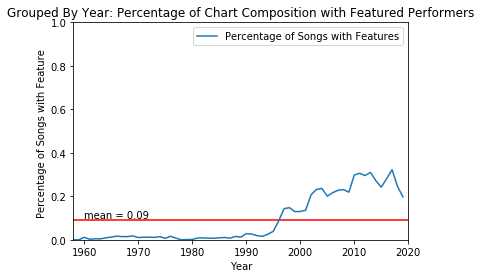

In [128]:
year_groupby.has_feature.plot(label='Percentage of Songs with Features')
plt.xlim(1958, 2020)
plt.ylim(0, 1)
plt.xlabel('Year')
plt.hlines(y=0.09, xmin = 1958, xmax = 2020, color = 'red')
plt.annotate(s = 'mean = 0.09', xy = (1960, .1))
plt.ylabel('Percentage of Songs with Feature ')
plt.title('Grouped By Year: Percentage of Chart Composition with Featured Performers')
plt.legend(loc='upper right')

In [119]:
year_groupby.weeks_on_chart.describe()

count    62.000000
mean      9.057622
std       2.486011
min       5.048269
25%       6.831346
50%       8.957378
75%      11.332670
max      13.085385
Name: weeks_on_chart, dtype: float64

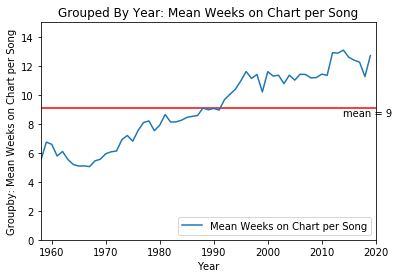

In [129]:
year_groupby.weeks_on_chart.plot(label = 'Mean Weeks on Chart per Song')
plt.xlim(1958, 2020)
plt.ylim(0, 15)
plt.xlabel('Year')
plt.hlines(y=9.06, xmin = 1958, xmax = 2020, color = 'red')
plt.annotate(s = 'mean = 9', xy = (2014, 8.5))
plt.ylabel('Groupby: Mean Weeks on Chart per Song')
plt.title('Grouped By Year: Mean Weeks on Chart per Song')
plt.legend(loc='lower right')

## Sample dataframes- 

## this is just me seeing what dataframes with 1, 2, and 3 observations look like.

In [130]:
one_week_value_count_df = song_value_count_df[song_value_count_df['total_weeks'].isin([1])]

In [131]:
one_week_value_count_df.shape

(2011, 2)

In [132]:
one_week_value_count_df.head(50)

,song_id,total_weeks
26182,DooleyThe Olympics,1
26183,1942 FlowsMeek Mill,1
26184,Ain't No Stopping Us NowKane Brown,1
26185,A Feelin' Like ThatGary Allan,1
26186,Ready To Love AgainLady Antebellum,1
26187,Victory LapNipsey Hussle Featuring Stacy Barthe,1
26188,At The ShoreJohnny Caswell,1
26189,Supernatural SuperseriousR.E.M.,1
26190,Little SerenadeThe Ames Brothers,1
26191,Can't You SeeWaylon Jennings,1


In [133]:
remedy_adele_df = billboard_df[billboard_df['song_id'].str.contains("RemedyAdele")]

In [134]:
remedy_adele_df.shape

(1, 16)

In [135]:
remedy_adele_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature
72478,2015-12-12,87,Remedy,Adele,RemedyAdele,1,NaN,87,1,2015-12-12,12,12,2015,Adele,None,0


In [136]:
remedy_adele_df = remedy_adele_df.drop(columns=['month', 'day', 'year'])

In [137]:
two_week_value_count_df = song_value_count_df[song_value_count_df['total_weeks'].isin([2])]

In [138]:
# note: what's going on with the font in 'Green Christmas?'
# postscript: the italicized was because the song is "Green Chri$tma$" and the italics do something weird and markdowny
two_week_value_count_df.head(50)

,song_id,total_weeks
24646,To Make A Big Man CryRoy Head,2
24647,No Time Like The Right TimeThe Blues Project,2
24648,Where Do I GoCarla Thomas,2
24649,EmotionBarbra Streisand,2
24650,AmericaSimon & Garfunkel,2
24651,B**** I'm MadonnaMadonna Featuring Nicki Minaj,2
24652,A Lover's ConcertoMrs. Miller,2
24653,Baby It's Cold OutsideRay Charles & Betty Carter,2
24654,The Same Old HurtBurl Ives,2
24655,One More TownThe Kingston Trio,2


In [139]:
dont_hurt_yourself_df = billboard_df[billboard_df['song_id'].str.contains("Don't Hurt YourselfBeyonce Featuring Jack White")]

In [140]:
dont_hurt_yourself_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature
1756,2016-05-14,28,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,NaN,28,1,2016-05-14,5,14,2016,Beyonce,Jack White,1
119881,2016-05-21,37,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,28.0,28,2,2016-05-21,5,21,2016,Beyonce,Jack White,1


## Note: I tried to just pick out a song I knew, but this is unexpected - a song from a huge artist being on the charts for 2 weeks, being in the Top 40 both weeks, and then just disappearing. I'm going to verify this quickly

In [141]:
beyonce_doublecheck_df = billboard_df[billboard_df['performer'].str.contains("Beyonce Featuring Jack White")]

In [142]:
beyonce_doublecheck_df.head(50)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature
1756,2016-05-14,28,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,NaN,28,1,2016-05-14,5,14,2016,Beyonce,Jack White,1
119881,2016-05-21,37,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,28.0,28,2,2016-05-21,5,21,2016,Beyonce,Jack White,1


In [143]:
beyonce_triplecheck_df = billboard_df[billboard_df['song'].str.contains("Don't Hurt Yourself")]

In [144]:
beyonce_triplecheck_df.head(50)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature
1756,2016-05-14,28,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,NaN,28,1,2016-05-14,5,14,2016,Beyonce,Jack White,1
119881,2016-05-21,37,Don't Hurt Yourself,Beyonce Featuring Jack White,Don't Hurt YourselfBeyonce Featuring Jack White,1,28.0,28,2,2016-05-21,5,21,2016,Beyonce,Jack White,1


# ok, looks like the data is valid, and Wikipedia backs it. This is something interesting to think about: I assumed that songs slowly faded away, and I guess they don't always do that

In [145]:
three_week_value_count_df = song_value_count_df[song_value_count_df['total_weeks'].isin([3])]

In [146]:
three_week_value_count_df.head(50)

,song_id,total_weeks
23274,Da Doo Ron Ron (When He Walked Me Home)Ian Mat...,3
23275,Caught In A DreamAlice Cooper,3
23276,Christmas LightsColdplay,3
23277,Losers Weepers - Part IEtta James,3
23278,"Call Me (From ""Booty Call"")Too Short & Lil' Kim",3
23279,Don't Stop5 Seconds Of Summer,3
23280,What Are We Going To Do?David Jones,3
23281,On The Way HomeThe Buffalo Springfield,3
23282,California DayStarland Vocal Band,3
23283,I'm Outta LoveAnastacia,3


In [147]:
shooting_shark_df = billboard_df[billboard_df['song_id'].str.contains("Shooting SharkBlue Oyster Cult")]

In [148]:
shooting_shark_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature
75038,1984-02-11,94,Shooting Shark,Blue Oyster Cult,Shooting SharkBlue Oyster Cult,1,NaN,94,1,1984-02-11,2,11,1984,Blue Oyster Cult,None,0
126843,1984-02-18,85,Shooting Shark,Blue Oyster Cult,Shooting SharkBlue Oyster Cult,1,94.0,85,2,1984-02-18,2,18,1984,Blue Oyster Cult,None,0
168888,1984-02-25,83,Shooting Shark,Blue Oyster Cult,Shooting SharkBlue Oyster Cult,1,85.0,83,3,1984-02-25,2,25,1984,Blue Oyster Cult,None,0


In [149]:
# Calculating "Week-Points"- my way of considering chart position

billboard_df['week_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1)

In [150]:
billboard_df.head(200)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature,week_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None,0,26
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None,0,48
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None,0,58
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None,0,64
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None,0,74
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990,Jane Child,None,0,77
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990,Jane Child,None,0,89
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990,Jane Child,None,0,95
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990,Jane Child,None,0,95
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990,Jane Child,None,0,99


In [151]:
# validating- we want this to be homogenous
billboard_df.week_points.value_counts()

20     3180
83     3180
75     3179
86     3179
48     3179
53     3179
43     3179
38     3179
34     3179
67     3179
31     3179
71     3179
27     3179
51     3179
93     3179
96     3179
41     3178
7      3178
35     3178
36     3178
5      3178
39     3178
40     3178
15     3178
16     3178
44     3178
45     3178
46     3178
47     3178
4      3178
3      3178
42     3178
33     3178
32     3178
23     3178
17     3178
13     3178
18     3178
12     3178
21     3178
22     3178
24     3178
8      3178
25     3178
49     3178
11     3178
28     3178
30     3178
10     3178
100    3178
1      3178
99     3178
85     3178
74     3178
77     3178
78     3178
79     3178
81     3178
84     3178
87     3178
70     3178
89     3178
90     3178
92     3178
94     3178
97     3178
98     3178
73     3178
76     3178
69     3178
63     3178
54     3178
55     3178
57     3178
58     3178
59     3178
60     3178
61     3178
64     3178
68     3178
65     3178
37     3177
80     3177
29  

# Making groupbys - I'm just going to make them for now and explore at some point

In [152]:
performer_groupby = billboard_df.groupby('performer')

In [153]:
song_id_groupby = billboard_df.groupby('song_id')

In [154]:
year_groupby = billboard_df.groupby('year')

In [155]:
song_id_summed_groupby = song_id_groupby.sum()

In [156]:
song_id_summed_groupby.week_points.max()

5932

In [157]:


song_id_summed_groupby.head(100)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,week_points
song_id,,,,,,,,,,
"""B"" GirlsYoung And Restless",1065,15,974.0,889,120,94,227,29850,0,450
"""Cherry Cherry"" from Hot August NightNeil Diamond",479,10,428.0,459,55,40,178,19730,0,531
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",684,9,622.0,678,45,98,123,17757,9,225
"""Joy"" Pt. IIsaac Hayes",380,9,338.0,368,45,34,140,17764,0,529
"""Roots"" MedleyQuincy Jones",494,7,411.0,468,28,24,89,13839,0,213
"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",507,9,429.0,386,45,39,136,17631,0,402
#1 Dee JayGoody Goody,452,5,353.0,418,15,58,70,9890,0,53
#1Nelly,802,20,730.0,637,210,139,290,40029,0,1218
#9 DreamJohn Lennon,367,12,320.0,325,78,42,162,23698,0,845


In [158]:
song_id_summed_groupby.head(200)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,week_points
song_id,,,,,,,,,,
"""B"" GirlsYoung And Restless",1065,15,974.0,889,120,94,227,29850,0,450
"""Cherry Cherry"" from Hot August NightNeil Diamond",479,10,428.0,459,55,40,178,19730,0,531
"""Having A Party"" MedleyThe Ovations (Featuring Louis Williams)",684,9,622.0,678,45,98,123,17757,9,225
"""Joy"" Pt. IIsaac Hayes",380,9,338.0,368,45,34,140,17764,0,529
"""Roots"" MedleyQuincy Jones",494,7,411.0,468,28,24,89,13839,0,213
"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",507,9,429.0,386,45,39,136,17631,0,402
#1 Dee JayGoody Goody,452,5,353.0,418,15,58,70,9890,0,53
#1Nelly,802,20,730.0,637,210,139,290,40029,0,1218
#9 DreamJohn Lennon,367,12,320.0,325,78,42,162,23698,0,845


# OK taking inventory really quickly:

## billboard_df is the original dataset
## performer_groupby is a groupby by performer
## song_id_groupby is a groupby by song_id



In [159]:
song_id_summed_groupby.week_points.describe()

count    28193.00000
mean       569.25031
std        625.16761
min          1.00000
25%         89.00000
50%        361.00000
75%        877.00000
max       5932.00000
Name: week_points, dtype: float64

In [160]:
performer_groupby.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature,week_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None,0,26
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None,0,48
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None,0,58
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None,0,64
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None,0,74
21,2011-06-04,92,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,NaN,92,1,2011-06-04,6,4,2011,Jason Derulo,None,0,9
22,2011-06-11,18,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,92.0,18,2,2011-06-11,6,11,2011,Jason Derulo,None,0,83
23,2011-06-18,17,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,18.0,17,3,2011-06-18,6,18,2011,Jason Derulo,None,0,84
24,2011-06-25,18,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,17.0,17,4,2011-06-25,6,25,2011,Jason Derulo,None,0,83
25,2011-07-02,14,Don't Wanna Go Home,Jason Derulo,Don't Wanna Go HomeJason Derulo,1,18.0,14,5,2011-07-02,7,2,2011,Jason Derulo,None,0,87


In [161]:
performer_summed_groupby = performer_groupby.sum()

In [162]:
performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,week_points
performer,,,,,,,,,,
"""Groove"" Holmes",1000,14,846.0,982,72,112,198,27524,0,414
"""Little"" Jimmy Dickens",422,10,375.0,377,55,110,168,19650,0,588
"""Pookie"" Hudson",96,1,0.0,96,1,5,25,1963,0,5
"""Weird Al"" Yankovic",5492,91,4462.0,3897,601,544,1458,181406,0,3699
'N Sync,5006,172,4478.0,3356,2004,1042,2577,343972,0,12366


In [163]:

performer_summed_groupby = performer_summed_groupby.sort_values(by=['week_points'], ascending=False)

In [164]:
performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,week_points
performer,,,,,,,,,,
Elvis Presley,36785,967,30510.0,29953,5807,6413,15245,1874106,0,59468
Madonna,29188,857,24576.0,12426,8391,5545,13405,1707296,0,57369
Elton John,34312,892,29773.0,23644,8165,6053,13817,1764035,0,55477
Taylor Swift,33121,1324,27140.0,20768,12746,5787,13843,1748032,0,54648
Mariah Carey,14851,735,12428.0,7015,7517,4056,9477,1213160,0,46456


# This is the end of what I originally wrote. 

# I'm going to use a new notebook to re-run all the charts I did for total weeks on chart-points